In [1]:
!pip install nltk seaborn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}

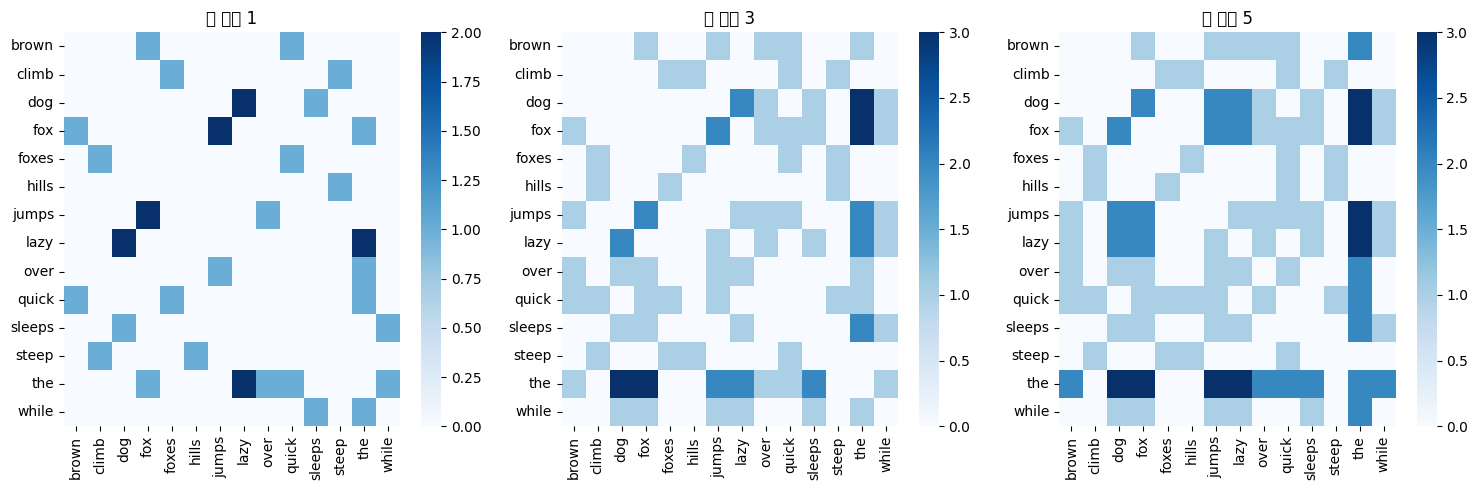


연습 1 분석:
- 창 크기 1: 행렬이 매우 희소하며, 인접 단어(예: "quick"과 "brown")만 표시.
- 창 크기 3: 더 많은 관계를 보여주며, "fox"와 "jumps" 같은 문맥 포함.
- 창 크기 5: 행렬이 더 밀집하지만, "the"와 "hills" 같은 관련 없는 단어 쌍 포함 가능.
창 크기 3은 명확성과 정보의 균형을 이루며 가장 적합.



In [2]:
# 의존성 설치
!pip install nltk seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('punkt_tab')

# 말뭉치 정의
corpus = [
    "the quick brown fox jumps over the lazy dog",
    "the lazy dog sleeps while the fox jumps",
    "quick foxes climb steep hills"
]

# 토큰화
tokenized_corpus = [word_tokenize(s.lower()) for s in corpus]
vocab = sorted(set(word for s in tokenized_corpus for word in s))
word2idx = {word: idx for idx, word in enumerate(vocab)}

# 동시출현 행렬 생성 함수
def build_cooc_matrix(tokenized_corpus, vocab, window_size):
    cooc_matrix = np.zeros((len(vocab), len(vocab)))
    for sentence in tokenized_corpus:
        for i, word in enumerate(sentence):
            start = max(0, i - window_size)
            end = min(len(sentence), i + window_size + 1)
            for j in range(start, end):
                if i != j:
                    cooc_matrix[word2idx[word]][word2idx[sentence[j]]] += 1
    return cooc_matrix

# 행렬 생성
matrices = {}
for ws in [1, 3, 5]:
    matrices[ws] = build_cooc_matrix(tokenized_corpus, vocab, ws)

# 히트맵 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ws in enumerate([1, 3, 5]):
    sns.heatmap(matrices[ws], ax=axes[i], xticklabels=vocab, yticklabels=vocab, cmap='Blues')
    axes[i].set_title(f'창 크기 {ws}')
plt.tight_layout()
plt.savefig('window_size_comparison.png')
plt.show()

# 분석 출력
print("""
연습 1 분석:
- 창 크기 1: 행렬이 매우 희소하며, 인접 단어(예: "quick"과 "brown")만 표시.
- 창 크기 3: 더 많은 관계를 보여주며, "fox"와 "jumps" 같은 문맥 포함.
- 창 크기 5: 행렬이 더 밀집하지만, "the"와 "hills" 같은 관련 없는 단어 쌍 포함 가능.
창 크기 3은 명확성과 정보의 균형을 이루며 가장 적합.
""")